<a href="https://colab.research.google.com/github/robertoalvarezm/EcologiaMatematicaCurso2024/blob/main/RedesMulticapaEtzel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pymnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 7.6 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

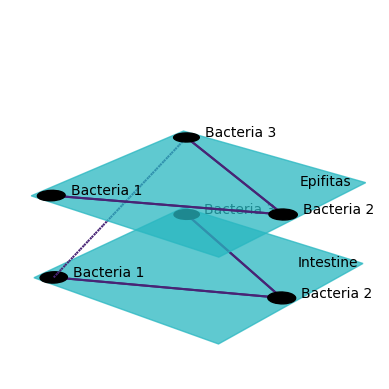

In [24]:
from pymnet import *
net = MultilayerNetwork(aspects=1)
# "Bacteria 1" from layer "Epifitas" is connected to "Bacteria 2" from layer "Epifitas"
net["Bacteria 1", "Epifitas"]["Bacteria 2", "Epifitas"] = 1
net["Bacteria 2", "Epifitas"]["Bacteria 3", "Epifitas"] = 1
net["Bacteria 3", "Intestine"]["Bacteria 2", "Intestine"] = 1
net["Bacteria 2", "Intestine"]["Bacteria 1", "Intestine"] = 1
# "Bacteria 3" from layer "Epifitas" is connected to "Bacteria 1" from layer "Intestine"
net["Bacteria 3", "Epifitas"]["Bacteria 1", "Intestine"] = 1
fig = draw(net, layerPadding=0.05,layout="circular",edgeColorRule={"rule":"edgeweight", "colormap":"viridis", "scaleby":0.1},
           defaultLayerLabelLoc=(0.8,0.8))
fig.savefig("fig_etzel.pdf")
from google.colab import files
files.download("fig_etzel.pdf")

# Monoplex Networks

`MultilayerNetwork` is the basic network class in the library – all other types of networks are special cases of it. In order to get a monoplex network object, you can simply construct a MultilayerNetwork with 0 aspects.

In [9]:
net = MultilayerNetwork(aspects=0)

You can now start adding nodes to the network with the add_node method:

In [10]:
net.add_node("A")
net.add_node("B")
net.add_node("C")


Iterating over the network object will yield all the nodes.


In [12]:
list(net)

['B', 'A', 'C']

You can access the node objects of the network with the get syntax. The node objects can be used, for example, to get the degree or strength of the node.

In [13]:
net["A"].deg()

0

You can now start adding edges to your network. There are two basic ways of doing this. As the first option, you can use syntax which resembles setting elements in an adjacency matrix:



In [14]:
net["A","B"]=1
net["A","C"]=1

In [15]:
net["A"].deg()

2

In [16]:
list(net)

['B', 'A', 'C']

As a second option, you can first access a node object and then get the edge pointing to a neighbor of that node:

In [17]:
net["C"]["B"]=1